# Basic quantum calculator

A %quantum magic command for evaluating basic quantum circuit calculations using `numpy`.

In [1]:
import quantum

## Quantum states

In [2]:
# Zero
%quantum |0>

|0⟩

In [3]:
# One
%quantum |1>

|1⟩

In [4]:
# Plus
%quantum |+>

1/√2 |0⟩ + 1/√2 |1⟩

In [5]:
import numpy as np
_.view(np.ndarray)

array([[0.70710678],
       [0.70710678]])

In [6]:
# Multiple qubits
%quantum |1010101>

|1010101⟩

In [7]:
# Superposition
%quantum |+++>

1/√8 |000⟩ + 1/√8 |001⟩ + 1/√8 |010⟩ + 1/√8 |011⟩ + 1/√8 |100⟩ + 1/√8 |101⟩ + 1/√8 |110⟩ + 1/√8 |111⟩

## Gate operations

In [8]:
# Bell state
%quantum CX01 H0 |00>

1/√2 |00⟩ + 1/√2 |11⟩

In [9]:
# Bell state, alternative |+> notation
%quantum CX01 |+0>

1/√2 |00⟩ + 1/√2 |11⟩

In [10]:
# Apply multi-qubit gate
# Index zero starts from left
%quantum X0 X2 X4 |000000>

|101010⟩

In [11]:
# One-qubit gate sequence
%quantum X0 I0 Y0 H0

[farray([[0, 1],
         [1, 0]]),
 farray([[1, 0],
         [0, 1]]),
 farray([[     0,     1i],
         [    1i,      0]]),
 farray([[  1/√2,   1/√2],
         [  1/√2,   1/√2]])]

In [12]:
# Multi-qubit gate
%quantum X0*X1*X2

[farray([[0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0]])]

In [13]:
# Multi-qubit gate
%quantum X2

[farray([[0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 1, 0]])]


## Variable assignments (wip)

In [14]:
import numpy as np

In [15]:
foo = %quantum |00>
bar = %quantum |11>

In [16]:
baz = (foo + bar) / np.sqrt(2)
baz

1/√2 |00⟩ + 1/√2 |11⟩

## Plotting

In [42]:
import numpy as np
rho = np.dot(baz, baz.T)
rho.view(np.ndarray)

array([[0.5, 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5]])

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_density_matrix(rho, size_scale=1):
    figsize=tuple(np.array([4,3]) * size_scale)
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(111, projection='3d')
    num_qubits = int(np.log2(len(rho)))
    num_elements = 2**num_qubits
    xpos = np.array(list(range(num_elements)) * num_elements)
    ypos = np.array([_n for n in range(num_elements) for _n in [n]*num_elements])
    zpos = np.array([0] * num_elements**2)
    dx = np.ones(num_elements**2)
    dy = np.ones(num_elements**2)
    dz = rho.flatten()
    blue = '#00ceee'
    red = '#ee3300'
    colors = [blue if d >= 0 else red for d in dz]

    ax1.bar3d(xpos, ypos, zpos, dx, dy, np.abs(dz), color=colors)
    plt.xticks(np.arange(num_elements) + .5, [np.binary_repr(n, num_qubits) for n in range(num_elements)])
    plt.yticks(np.arange(num_elements) + .5, [np.binary_repr(n, num_qubits) for n in range(num_elements)])
    plt.title("$\\rho$ density matrix")

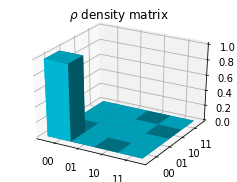

In [19]:
%matplotlib inline
rho = np.dot(foo, foo.T)
plot_density_matrix(rho)

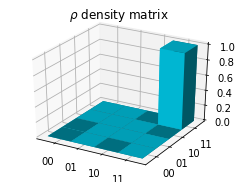

In [20]:
rho = np.dot(bar, bar.T)
plot_density_matrix(rho)

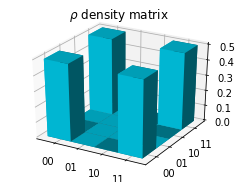

In [21]:
rho = np.dot(baz, baz.T)
plot_density_matrix(rho)

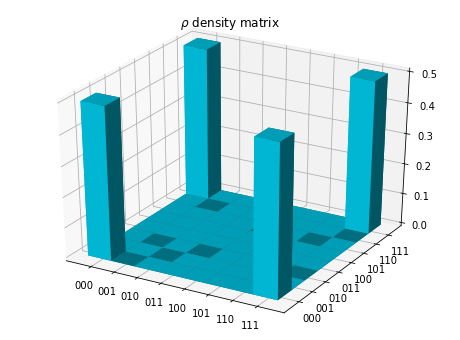

In [22]:
state1 = %quantum |000>
state2 = %quantum |111>
state = (state1 + state2)/np.linalg.norm(state1 + state2)
rho = np.dot(state, state.T)
plot_density_matrix(rho, size_scale=2)

In [23]:
state = %quantum T0 |+>
state

1/√2 |0⟩ + 1/√2i |1⟩

## RUS

RusArcTan2 = H0.H1.T0.T1.CX12.CX10.ConjT(T0).H0.H1.T2.Z2)

RusArcTan2 *= (-1/I.353553) // MatrixForm / N

In [24]:
state = %quantum H1.T1.CNOT21.Z2.T2.H0.TD0.CNOT10.T0.H0*H1 |000>

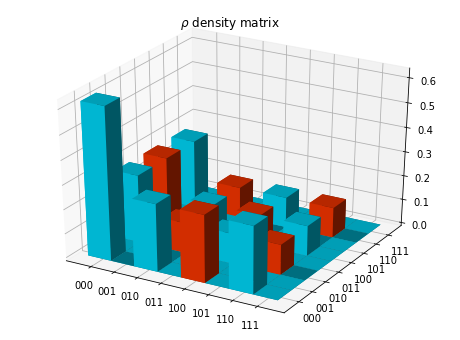

In [25]:
rho = np.dot(state, state.T)
plot_density_matrix(rho, size_scale=2)

In [26]:
RUS = %quantum H1*H0.T1.CNOT21.Z2.T2.TD0.CNOT10.T0.H0*H1

In [27]:
res = %quantum H1*H0.T1.CNOT21.Z2.T2.TD0.CNOT10.T0.H0*H1 |000>
res

(3/4+1/4i) |000⟩ + -√-1/√8i |010⟩ + -√-1/√8i |100⟩ + -√-1/√8i |110⟩

In [28]:
res/(4/(1-1j))

(1/4-1/8i) |000⟩ + -1/8i |010⟩ + 1/8i |100⟩ + -1/8i |110⟩

In [29]:
RUSresult = np.round(RUS[0]*(4/(1-1j)), 10)

In [30]:
import sympy as s
s.init_printing()
RUSresult

farray([[(1+2i),      0,      1,      0,      1,      0,     -1,      0],
        [     0, (1-2i),      0,      1,      0,     -1,      0,      1],
        [     1,      0, (1+2i),      0,     -1,      0,      1,      0],
        [     0,     -1,      0, (-1+2i),      0,     -1,      0,      1],
        [    -1,      0,      1,      0,      1,      0, (1+2i),      0],
        [     0,      1,      0,     -1,      0,      1,      0, (1-2i)],
        [     1,      0,     -1,      0, (1+2i),      0,      1,      0],
        [     0,      1,      0,     -1,      0, (-1+2i),      0,     -1]])

In [31]:
state = %quantum |000>
res = np.dot(RUSresult, state).view(quantum.formatter.dirac)
res

(1+2i) |000⟩ + |010⟩ + -1 |100⟩ + |110⟩

In [32]:
from quantum.gates import I, Z
np.dot(np.kron(I, np.kron(I, np.conjugate(Z))), res).view(quantum.formatter.dirac)

(1+2i) |000⟩ + |010⟩ + -1 |100⟩ + |110⟩

In [33]:
RUSresult

farray([[(1+2i),      0,      1,      0,      1,      0,     -1,      0],
        [     0, (1-2i),      0,      1,      0,     -1,      0,      1],
        [     1,      0, (1+2i),      0,     -1,      0,      1,      0],
        [     0,     -1,      0, (-1+2i),      0,     -1,      0,      1],
        [    -1,      0,      1,      0,      1,      0, (1+2i),      0],
        [     0,      1,      0,     -1,      0,      1,      0, (1-2i)],
        [     1,      0,     -1,      0, (1+2i),      0,      1,      0],
        [     0,      1,      0,     -1,      0, (-1+2i),      0,     -1]])

In [34]:

res

(1+2i) |000⟩ + |010⟩ + -1 |100⟩ + |110⟩

In [35]:
Zcorr, = %quantum Z2
Zcorr

farray([[ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1]])

In [36]:
np.dot(Zcorr, RUSresult)

farray([[(1+2i),      0,      1,      0,      1,      0,     -1,      0],
        [     0, (-1+2i),      0,     -1,      0,      1,      0,     -1],
        [     1,      0, (1+2i),      0,     -1,      0,      1,      0],
        [     0,      1,      0, (1-2i),      0,      1,      0,     -1],
        [    -1,      0,      1,      0,      1,      0, (1+2i),      0],
        [     0,     -1,      0,      1,      0,     -1,      0, (-1+2i)],
        [     1,      0,     -1,      0, (1+2i),      0,      1,      0],
        [     0,     -1,      0,      1,      0, (1-2i),      0,      1]])

In [37]:

Zcorr

farray([[ 1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1]])

In [38]:
RUSresult

farray([[(1+2i),      0,      1,      0,      1,      0,     -1,      0],
        [     0, (1-2i),      0,      1,      0,     -1,      0,      1],
        [     1,      0, (1+2i),      0,     -1,      0,      1,      0],
        [     0,     -1,      0, (-1+2i),      0,     -1,      0,      1],
        [    -1,      0,      1,      0,      1,      0, (1+2i),      0],
        [     0,      1,      0,     -1,      0,      1,      0, (1-2i)],
        [     1,      0,     -1,      0, (1+2i),      0,      1,      0],
        [     0,      1,      0,     -1,      0, (-1+2i),      0,     -1]])

In [39]:
np.dot(Zcorr, res).view(quantum.formatter.dirac)

(1+2i) |000⟩ + |010⟩ + -1 |100⟩ + |110⟩